In [116]:
from HierarchyClusteringWithoutLogs import hierarchy
from Linkages import single_linked
from Linkages import complete_linked
from Linkages import min_max_linked
from Linkages import group_average_linked
from Linkages import weighted_average_linked
from UltrametricMatrix import ultramatrix
import scipy.stats as sts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
def pipe(points, method):
    hierarchy_clusters = hierarchy(points, metric='euclidean', method=method)

    start_matrix = hierarchy_clusters[1]
    finish_matrix = ultramatrix(hierarchy_clusters[0], hierarchy_clusters[2])

    n_points = len(start_matrix) 
    N_edge = n_points * (n_points - 1) / 2

    SomeMetric = np.max(np.abs(finish_matrix - start_matrix)) / N_edge
    return SomeMetric

In [118]:
def get_gen_sample(size):
    N = int(size / 3)

    norm1 = sts.norm(1, 0.2)
    norm2 = sts.norm(1.5, 0.1)
    norm3 = sts.norm(2, 0.2)

    x = np.append(norm1.rvs(N), np.append(norm2.rvs(N), norm3.rvs(N), axis=0), axis=0)
    y = np.append(norm1.rvs(N), np.append(norm2.rvs(N), norm3.rvs(N), axis=0), axis=0)

    points = list(zip(x, y))

    return np.array(points)

In [119]:
MetricsFullExp = {
    'single_linked': [],
    'complete_linked': [],
    'group_average_linked': [],
    'weighted_average_linked': [],
    'min_max_linked': []
}

size = 100
sample_size = 4
n_iter = 10
points = get_gen_sample(size)
ssamples = []

for _ in range(n_iter):
    indices = np.random.choice(points.shape[0], size=sample_size, replace=False)
    sample = points[indices]
    ssamples.append(sample)

    MetricsFullExp['single_linked'].append(pipe(sample, single_linked))
    MetricsFullExp['complete_linked'].append(pipe(sample, complete_linked))
    MetricsFullExp['group_average_linked'].append(pipe(sample, group_average_linked))
    MetricsFullExp['weighted_average_linked'].append(pipe(sample, weighted_average_linked))
    MetricsFullExp['min_max_linked'].append(pipe(sample, min_max_linked))


Metrics = {}
for key in MetricsFullExp:
    left = np.quantile(MetricsFullExp[key], 0.025)
    right = np.quantile(MetricsFullExp[key], 0.975)
    mean_val = np.mean(MetricsFullExp[key])
    Metrics[key] = [round(left, 6), round(mean_val, 6), round(right, 6)]


res = pd.DataFrame(Metrics)
res.index = ['Left', 'Mean', 'Right']
res = res.T

In [120]:
res

,Left,Mean,Right
single_linked,0.009540,0.050752,0.110478
complete_linked,0.009540,0.051616,0.110478
group_average_linked,0.005078,0.029471,0.064335
weighted_average_linked,0.005524,0.029435,0.062227
min_max_linked,0.005524,0.029435,0.062227


In [121]:
results = pd.DataFrame(MetricsFullExp)

In [122]:
results = results[['single_linked', 'complete_linked', 'group_average_linked', 'min_max_linked']]

In [123]:
results

,single_linked,complete_linked,group_average_linked,min_max_linked
0,0.064342,0.064342,0.037759,0.036023
1,0.052702,0.052702,0.028036,0.031675
2,0.030380,0.030380,0.016408,0.018074
3,0.037452,0.037452,0.021220,0.021537
4,0.076156,0.076156,0.046768,0.041080
5,0.005399,0.005399,0.003097,0.003672
6,0.023804,0.023804,0.011902,0.011902
7,0.046885,0.046885,0.026446,0.026446
8,0.120442,0.120442,0.069435,0.068366
9,0.049962,0.058593,0.033638,0.035569


In [124]:
results[results.group_average_linked < results.min_max_linked]

,single_linked,complete_linked,group_average_linked,min_max_linked
1,0.052702,0.052702,0.028036,0.031675
2,0.030380,0.030380,0.016408,0.018074
3,0.037452,0.037452,0.021220,0.021537
5,0.005399,0.005399,0.003097,0.003672
9,0.049962,0.058593,0.033638,0.035569


In [131]:
K_var = 1

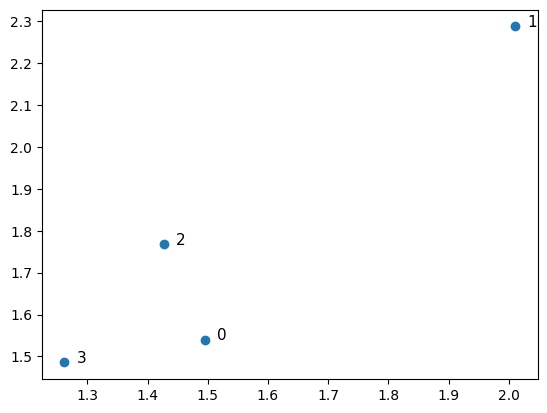

In [132]:
plt.scatter(ssamples[K_var][:,0], ssamples[K_var][:,1])
for i, xy in enumerate(ssamples[K_var]):
    plt.text(xy[0]+0.02, xy[1], str(i), fontsize=11)
plt.show()

In [155]:
pd.DataFrame(ssamples[K_var], columns=['X', 'Y']).round(2)

,X,Y
0,1.50,1.54
1,2.01,2.29
2,1.43,1.77
3,1.26,1.49


In [ ]:
new_data = ssamples[K_var].round(2)

In [ ]:
# 0: 2, 1
# 1: 4, 5
# 2: 1, 3
# 3: 0, 0

In [162]:
new_data = np.array([
    [2, 1],
    [4, 5],
    [1, 3],
    [0, 0]
])

In [163]:
new_data

array([[2, 1],
       [4, 5],
       [1, 3],
       [0, 0]])

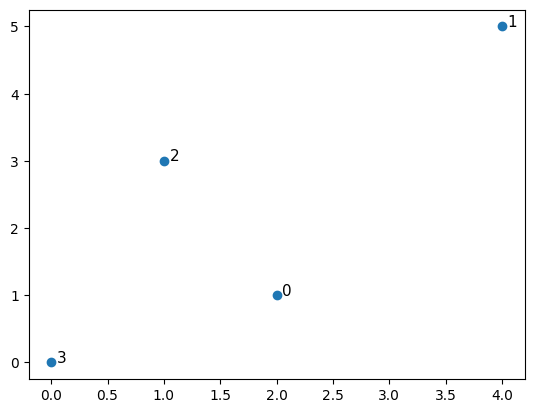

In [175]:
plt.scatter(new_data[:,0], new_data[:,1])
for i, xy in enumerate(new_data):
    plt.text(xy[0]+0.05, xy[1], str(i), fontsize=11)
plt.show()

In [167]:
from sklearn.metrics import pairwise_distances

pd.DataFrame(pairwise_distances(new_data, metric='euclidean'))

,0,1,2,3
0,0.000000,4.472136,2.236068,2.236068
1,4.472136,0.000000,3.605551,6.403124
2,2.236068,3.605551,0.000000,3.162278
3,2.236068,6.403124,3.162278,0.000000


In [184]:
3.605551 ** 2

12.999998013601001

In [185]:
from HierarchyClustering import hierarchy as hierarchylogs

In [186]:
logs = hierarchylogs(new_data, metric='euclidean', method=min_max_linked)

Distance matrix: 0 step
          0         1         2         3
0  0.000000  4.472136  2.236068  2.236068
1  4.472136  0.000000  3.605551  6.403124
2  2.236068  3.605551  0.000000  3.162278
3  2.236068  6.403124  3.162278  0.000000

Clusters:['0' '1' '2' '3']


(0, 2)
Clusters: ['(0, 2)' '1' '3']
Distance matrix: 1 step
          0         1         2
0  8.403124  4.038844  2.699173
1  4.038844  7.403124  6.403124
2  2.699173  6.403124  7.403124



((0, 2), 3)
Clusters: ['((0, 2), 3)' '1']
Distance matrix: 2 step
          0         1
0  8.403124  5.220984
1  5.220984  7.403124



(((0, 2), 3), 1)
Clusters: ['(((0, 2), 3), 1)']
Distance matrix: 3 step
     0
0  1.0





In [136]:
logs[K_var]

array([[0.        , 0.90901617, 0.23865367, 0.23941083],
       [0.90901617, 0.        , 0.78124495, 1.09745495],
       [0.23865367, 0.78124495, 0.        , 0.32742214],
       [0.23941083, 1.09745495, 0.32742214, 0.        ]])

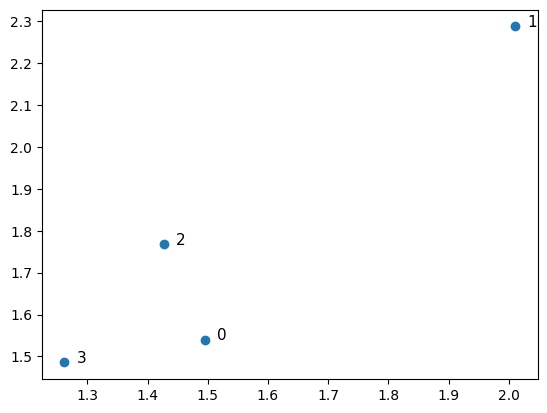

In [137]:
plt.scatter(ssamples[K_var][:,0], ssamples[K_var][:,1])
for i, xy in enumerate(ssamples[K_var]):
    plt.text(xy[0]+0.02, xy[1], str(i), fontsize=11)
plt.show()

In [37]:
len(results.query('min_max_linked < group_average_linked'))

0

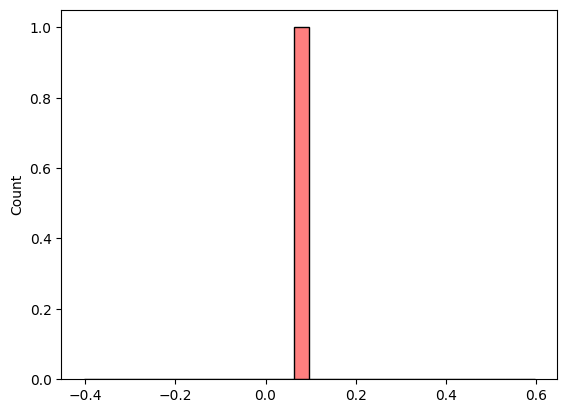

In [11]:
import seaborn as sns
sns.histplot(MetricsFullExp['single_linked'], bins=30, kde=True, color='red', alpha=0.5)
plt.show()